In [1]:
from scipy.io import wavfile
import IPython
import matplotlib.pyplot as plt
import sounddevice as sd

In [2]:
samplerate2, data2 = wavfile.read('./zx6r.wav')
IPython.display.Audio('./zx6r.wav')

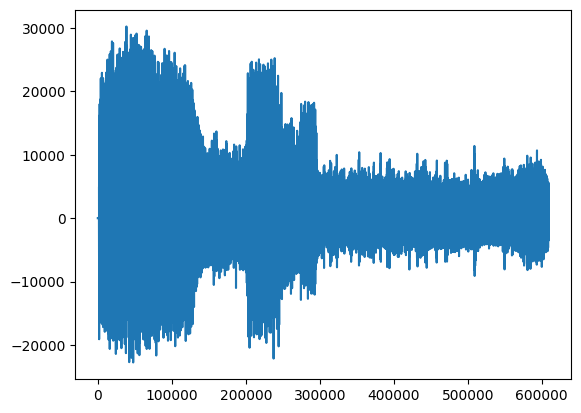

In [3]:
mono_data2 = data2[:, 0]

plt.plot(mono_data2)
plt.show()

In [4]:
from scipy import io, signal, fft
import numpy as np

N2 = len(data2)
T2 = 1. / samplerate2


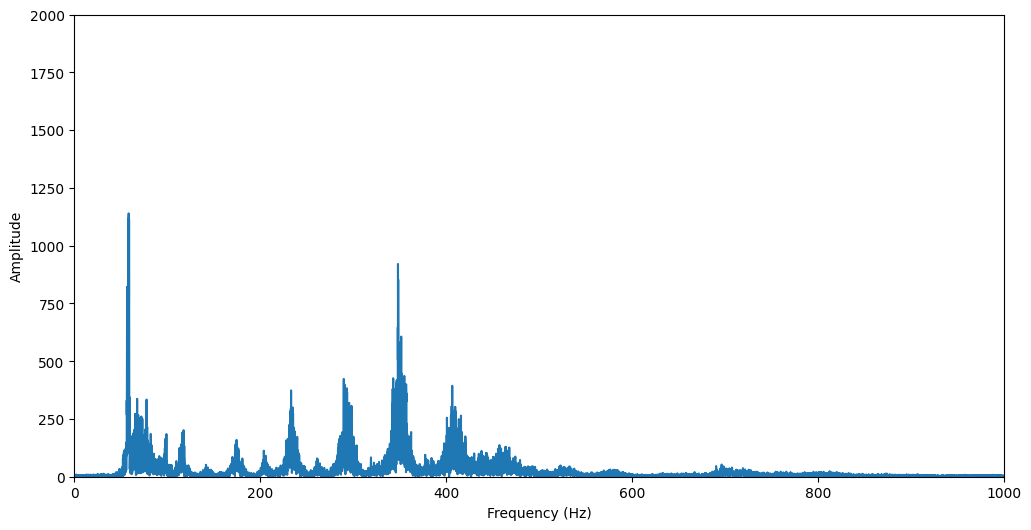

In [5]:
samplerate2, data2 = wavfile.read('./zx6r.wav')

# Mengambil saluran pertama untuk data mono
mono_data2 = data2[:, 0]

# Panjang sinyal dan interval waktu
N2 = len(mono_data2)
T2 = 1.0 / samplerate2

# Melakukan Transformasi Fourier Cepat (FFT)
fft_data2 = fft.fft(mono_data2)

# Menghasilkan array frekuensi positif
xf2 = fft.fftfreq(N2, T2)[:N2//2]

# Menghitung amplitudo spektrum frekuensi
amplitude2 = 2.0/N2 * np.abs(fft_data2[0:N2//2])

# Menentukan ukuran gambar
plt.figure(figsize=(12, 6))

# Memplot spektrum frekuensi
plt.plot(xf2, amplitude2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

# Menentukan batas sumbu x dan y untuk zoom
plt.xlim(0, 1000)  # Batas sumbu x dari 0 hingga 1000 Hz
plt.ylim(0, 2000)  # Batas sumbu y

plt.show()

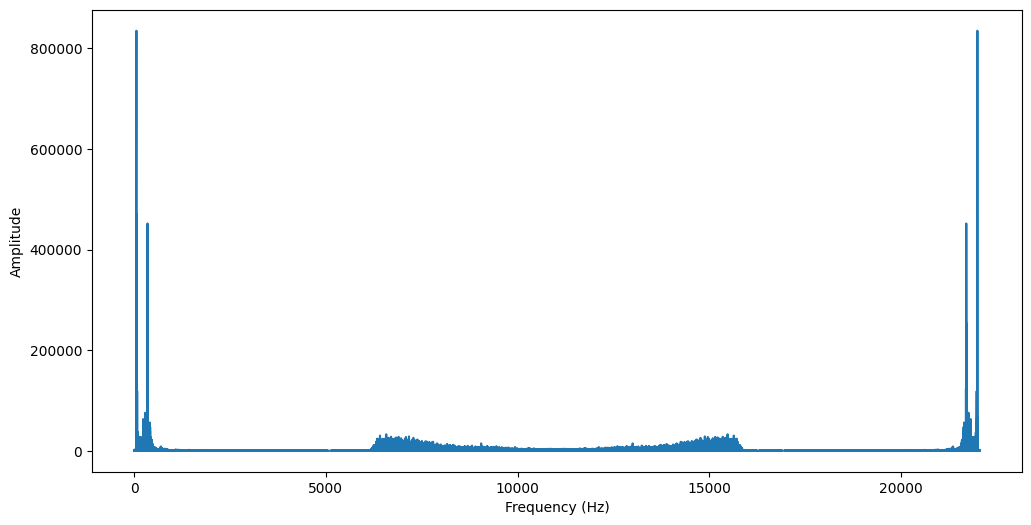

In [6]:
samplerate, data = wavfile.read('./zx6r.wav')
mono_data = data[:, 0]

N = len(mono_data)
T = 1.0 / samplerate

fft_data = fft.fft(mono_data)

xf = fft.fftfreq(N, T)[:N//2]
amplitude = np.abs(fft_data[N//2:])/N * np.abs(fft_data[0:N//2])

# Menentukan ukuran gambar
plt.figure(figsize=(12, 6))

# Memplot spektrum frekuensi
plt.plot(xf, amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.show()

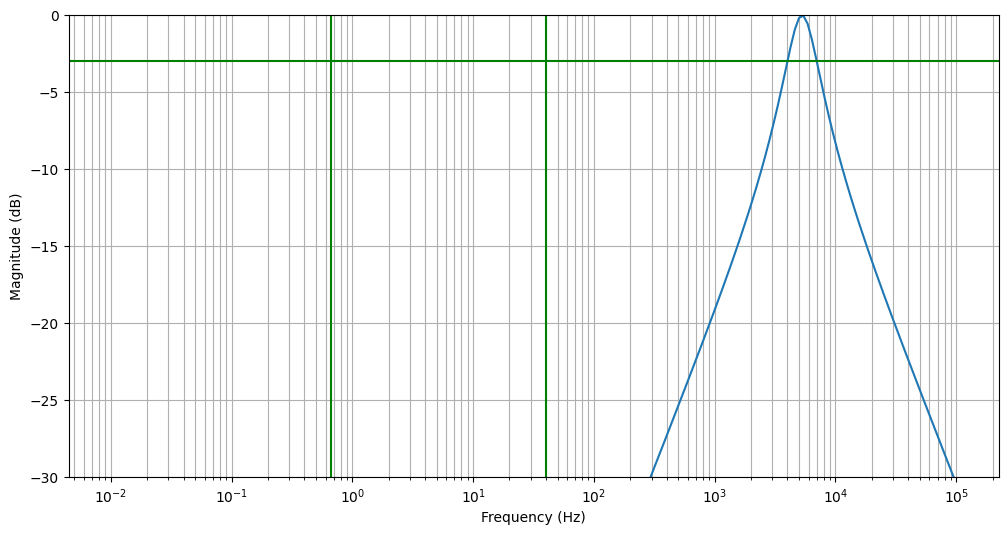

In [7]:
samplerate2, data2 = wavfile.read('./zx6r.wav')

# Mengambil saluran pertama untuk data mono
mono_data2 = data2[:, 0]

# Desain filter Butterworth analog
b, a = signal.butter(1, [4000, 7000], btype='bandpass', analog=True)

# Menghitung respons frekuensi filter
w, h = signal.freqs(b, a)

# Menentukan ukuran gambar
plt.figure(figsize=(12, 6)) 

# Memplot respons frekuensi
plt.semilogx(w, 20 * np.log10(abs(h)))

# Menandai batas-batas filter
plt.axvline(0.67, color='green')
plt.axvline(40, color='green')
plt.axhline(-3, color='green')

# Menambahkan grid
plt.grid(which='both', axis='both')

# Menentukan batas sumbu y
plt.ylim((-30, 0))

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')

plt.show() 


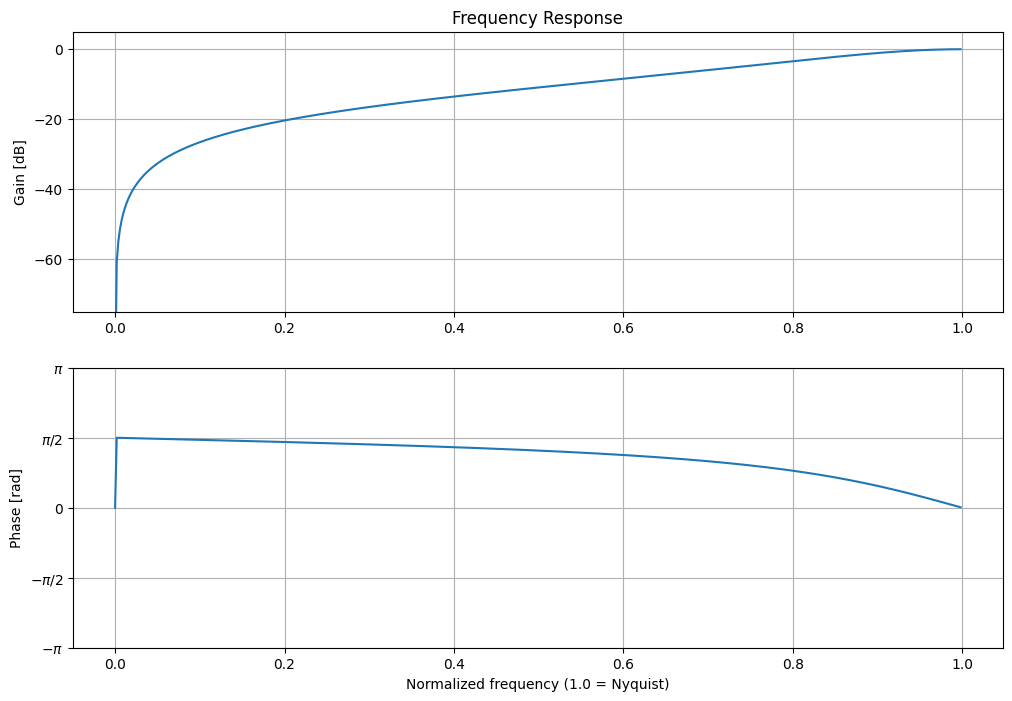

In [8]:
samplerate2, data2 = wavfile.read('./zx6r.wav')

# Mengambil saluran pertama untuk data mono
mono_data2 = data2[:, 0]

# Desain filter Butterworth high-pass
sos = signal.butter(1, 18000, 'hp', fs=samplerate2, output='sos')

# Menghitung respons frekuensi filter
w, h = signal.sosfreqz(sos)

# Menentukan ukuran gambar
plt.figure(figsize=(12, 8))

# Memplot respons frekuensi (Gain)
plt.subplot(2, 1, 1)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
plt.plot(w/np.pi, db)
plt.ylim(-75, 5)
plt.grid(True)
plt.yticks([0, -20, -40, -60])
plt.ylabel('Gain [dB]')
plt.title('Frequency Response')

# Memplot respons frekuensi (Phase)
plt.subplot(2, 1, 2)
plt.plot(w/np.pi, np.angle(h))
plt.grid(True)
plt.yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
           [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.ylabel('Phase [rad]')
plt.xlabel('Normalized frequency (1.0 = Nyquist)')

plt.show()

In [9]:
samplerate2, data2 = wavfile.read('./zx6r.wav')
filtered = signal.sosfilt(sos, mono_data2)

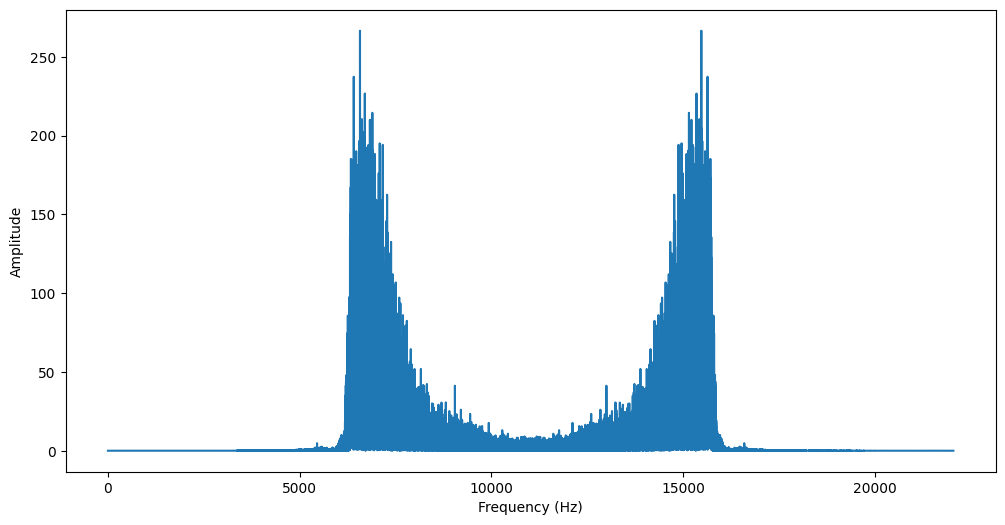

In [10]:
samplerate2, data2 = wavfile.read('./zx6r.wav')

# Mengambil saluran pertama untuk data mono
mono_dat2 = data2[:, 0]

# Desain filter Butterworth band-pass
sos = signal.butter(2, [15000, 17000], 'bp', fs=samplerate2, output='sos')

# Mengaplikasikan filter SOS ke data mono
filtered = signal.sosfilt(sos, mono_data)

# Panjang sinyal dan interval waktu
N = len(filtered)
T = 1.0 / samplerate2

# Melakukan transformasi Fourier cepat (FFT)
fft_data = np.fft.fft(filtered)

# Menghasilkan array frekuensi positif
xf = np.fft.fftfreq(N, T)[:N//2]

# Menghitung amplitudo spektrum frekuensi
amplitude = np.abs(fft_data[N//2:])/N * np.abs(fft_data[0:N//2])

# Menentukan ukuran gambar
plt.figure(figsize=(12, 6))

# Memplot spektrum frekuensi
plt.plot(xf, amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.show()

In [11]:
# Membaca file audio
samplerate2, data2 = wavfile.read('./zx6r.wav')

# Mengambil saluran pertama untuk data mono
mono_data2 = data2[:, 0]

# Desain filter Butterworth band-pass
sos = signal.butter(1, [3000, 10000], 'bp', fs=samplerate2, output='sos')

# Mengaplikasikan filter SOS ke data mono
filtered = signal.sosfilt(sos, mono_data2)

# Peningkatan volume
volume_factor = 6
increased_volume = filtered * volume_factor

# Menyimpan data mono yang sudah difilter dan diproses ke file output.wav
wavfile.write('output.wav', samplerate, increased_volume.astype(np.int16))


In [12]:
IPython.display.Audio('./output.wav')